In [2]:
%run 01_load_data.ipynb


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37636 entries, 0 to 37635
Data columns (total 42 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Application number                            37636 non-null  object 
 1   Date submitted                                37634 non-null  object 
 2   Date closed                                   37634 non-null  object 
 3   Student                                       37636 non-null  object 
 4   Mode of study                                 37636 non-null  object 
 5   Level of study (I - Engineering, M - Master)  37636 non-null  object 
 6   Language                                      37636 non-null  object 
 7   Specialization                                37636 non-null  object 
 8   Application status                            37636 non-null  object 
 9   Type of application                           37636 non-null

In [3]:
sa['Application status'].unique()

array(['Zamkniêty - decyzja pozytywna', 'Zamkniêty - decyzja negatywna',
       'Anulowany - usuniêty', 'Zamkniêty - inne',
       'Zamkniêty - odrzucony formalnie', 'Zwrócony do korekty',
       'W trakcie edycji - niez³o¿ony',
       'Decyzja pozytywna - oczekuje na realizacjê',
       'Rozpatrywany w dziekanacie',
       'Oczekuje na akceptacjê opiekuna pracy',
       'Oczekuje na wniosek Kierownika Zak³adu', '11', '8', '6', '4', '5',
       '3', '9', '12', 'Oczekuje na opiniê opiekuna pracy',
       'Oczekuje na decyzjê Dziekana ds. Studiów', '7', '10',
       'Oczekuje na decyzjê Dziekana ds. Studenckich'], dtype=object)

[Text(0, 0, '6471'),
 Text(0, 0, '3045'),
 Text(0, 0, '1936'),
 Text(0, 0, '24924'),
 Text(0, 0, '901'),
 Text(0, 0, '114'),
 Text(0, 0, '52'),
 Text(0, 0, '5'),
 Text(0, 0, '44'),
 Text(0, 0, '5'),
 Text(0, 0, '21'),
 Text(0, 0, '1'),
 Text(0, 0, '6'),
 Text(0, 0, '28'),
 Text(0, 0, '4'),
 Text(0, 0, '57'),
 Text(0, 0, '2'),
 Text(0, 0, '4'),
 Text(0, 0, '1'),
 Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '2')]

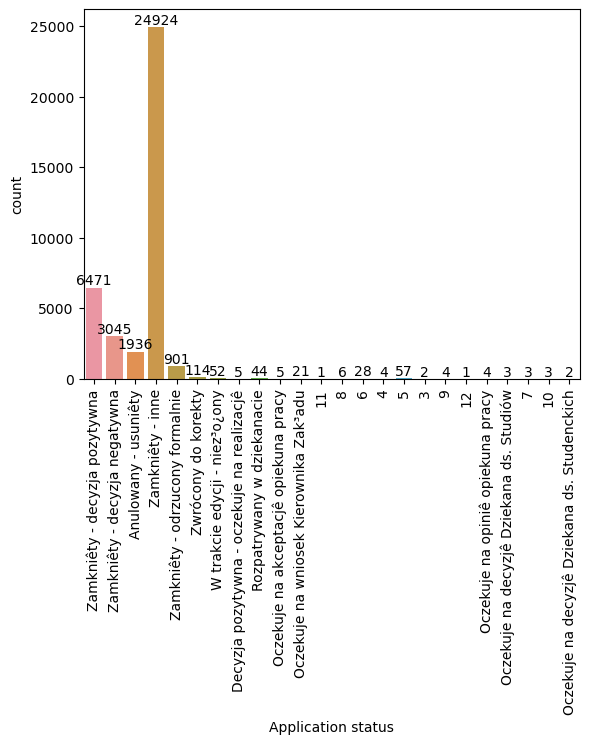

In [4]:
chart = sns.countplot(data=sa, x='Application status')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.bar_label(chart.containers[0])

Remove from dataset applications which does not have status which results from dean's office decision

In [5]:
positive_decisions = ['Zamkniêty - decyzja pozytywna', 'Zamkniêty - inne', 'Decyzja pozytywna - oczekuje na realizacjê']
negative_decisions = ['Zamkniêty - decyzja negatywna', 'Zamkniêty - odrzucony formalnie', 'Zwrócony do korekty']

In [6]:
def set_decision(row):
    if row['Application status'] in positive_decisions:
        return 1
    elif row['Application status'] in negative_decisions:
        return 0
    return -1

decision_column = sa.apply(set_decision, axis=1)
sa['decision'] = decision_column

In [7]:
# Filter decisions None
print(sa.shape)
sa = sa.loc[~(sa['decision'] == -1)]
print(sa.shape)

(37636, 43)
(35460, 43)


[Text(0, 0, '4060'), Text(0, 0, '31400')]

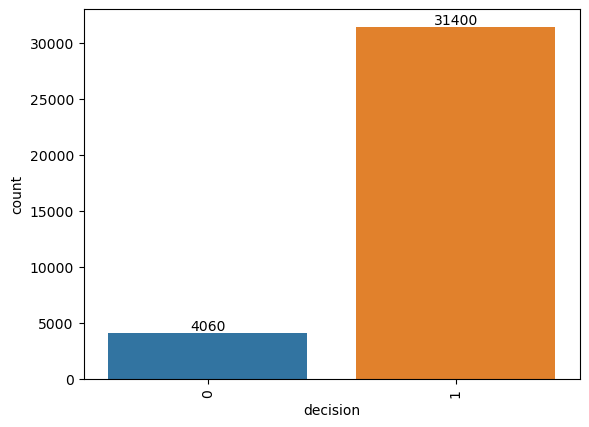

In [8]:
chart = sns.countplot(data=sa, x='decision')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.bar_label(chart.containers[0])

In [9]:
sa['decision'].describe()

count    35460.000000
mean         0.885505
std          0.318416
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: decision, dtype: float64

array([[<Axes: xlabel='Attachments', ylabel='Attachments'>,
        <Axes: xlabel='How many changes of statuses', ylabel='Attachments'>,
        <Axes: xlabel='Missing ECTS', ylabel='Attachments'>,
        <Axes: xlabel='Total ECTS', ylabel='Attachments'>,
        <Axes: xlabel='Missing subjects from sem 1', ylabel='Attachments'>,
        <Axes: xlabel='Missing subjects from sem 3', ylabel='Attachments'>,
        <Axes: xlabel='Thesis count', ylabel='Attachments'>,
        <Axes: xlabel='decision', ylabel='Attachments'>],
       [<Axes: xlabel='Attachments', ylabel='How many changes of statuses'>,
        <Axes: xlabel='How many changes of statuses', ylabel='How many changes of statuses'>,
        <Axes: xlabel='Missing ECTS', ylabel='How many changes of statuses'>,
        <Axes: xlabel='Total ECTS', ylabel='How many changes of statuses'>,
        <Axes: xlabel='Missing subjects from sem 1', ylabel='How many changes of statuses'>,
        <Axes: xlabel='Missing subjects from sem 3', y

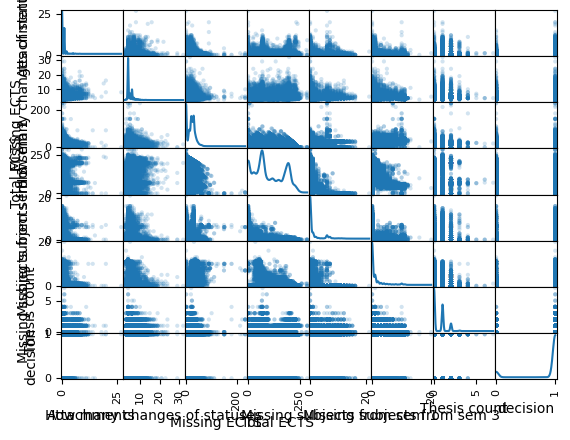

In [14]:
#from pandas.plotting import scatter_matrix
#scatter_matrix(sa, alpha=0.2, diagonal="kde")